In [2]:
!ln -s /proyecto

In [3]:
import pyconf

In [4]:
pyconf.formulario

GridspecLayout(children=(Dropdown(description='pos1-posmode', index=3, layout=Layout(grid_area='widget001'), o…

In [138]:
import numbers

with open('/proyecto/conf.cfg','w') as f:
    for i in pyconf.formulario.children:
        try:
            if isinstance(i.value, (list, tuple)):
                value = sum([int(v.split(':')[0]) for v in i.value if v.split(':')[0] != ''])
            else:
                value = i.value.split(':')[-1]
                
            try:
                if int(value) < 0: # -1 is blank
                    value = ''
            except ValueError:
                pass
            
        except AttributeError:
            value = i.value
            try:
                if int(value) < 0: # -1 is blank
                    value = ''
            except ValueError:
                pass

        print('{} ={}'.format(i.description,value),file=f)

In [6]:
ls /proyecto/

conf.cfg      igm10240.20o    Mariano/      PFD1.CAR      PFD2.CAR
igm1/         localPFD1.yaml  PFD10240.20n  PFD20240.20n  rtklib/
igm10240.20n  localPFD2.yaml  PFD10240.20o  PFD20240.20o


In [15]:
import pandas as pd

In [139]:
cat /proyecto/conf.cfg

pos1-posmode =static
pos1-frequency =l1
pos1-soltype =combined
pos1-elmask =10
pos1-snrmask =
pos1-dynamics =on
pos1-tidecorr =on
pos1-ionoopt =off
pos1-tropopt =saas
pos1-sateph =brdc
pos1-exclsats =
pos1-navsys =1
pos2-armode =fix-and-hold
pos2-gloarmode =on
pos2-arthres =5
pos2-arlockcnt =60
pos2-arelmask =20
pos2-aroutcnt =1
pos2-arminfix =120
pos2-elmaskhold =15
pos2-slipthres =0.05
pos2-maxage =30
pos2-rejionno =30
pos2-niter =5
pos2-baselen =0
pos2-basesig =0
out-solformat =llh
out-outhead =on
out-outopt =on
out-timesys =gpst
out-timeform =hms
out-timendec =3
out-degform =deg
out-fieldsep =
out-height =ellipsoidal
out-geoid =internal
out-solstatic =all
out-nmeaintv1 =0
out-nmeaintv2 =0
out-outstat =residual
stats-errratio =100
stats-errphase =0.003
stats-errphaseel =0.003
stats-errphasebl =0
stats-errdoppler =10
stats-stdbias =30
stats-stdiono =0.03
stats-stdtrop =0.3
stats-prnaccelh =0.1
stats-prnaccelv =0.01
stats-prnbias =0.0001
stats-prniono =0.001
stats-prntrop =0.0001
stat

In [37]:
DEG2RAD = 3.14159 / 180

In [39]:
from math import cos

In [43]:
!RinSum /proyecto/PFD10240.20o

# RinSum, part of the GPS Toolkit, Ver 4.1 8/26/15, Run 2020/11/26 22:06:17
+++++++++++++ RinSum summary of Rinex obs file /proyecto/PFD10240.20o +++++++++++++
---------------------------------- REQUIRED ----------------------------------
Rinex Version  2.11,  File type O,  System G (GPS).
Prgm: JJC Open Gps Read,  Run: 22 - OCT - 20 21:34,  By: Javier Clavijo
Marker name: PFD1, Marker type: .
Observer : Raul Clavijo,  Agency: RyJClavijo
Rec#: 3E302016,  Type: PromarkXCM,  Vers: 
Antenna # : 200803216,  Type : NAP100
Position      (XYZ,m) : (0.0000, 0.0000, 0.0000).
Antenna Delta (HEN,m) : (1.3780, 0.0000, 0.0000).
GPS Observation types (3):
 Type #01 (L1C) L1 GPSC/A phase
 Type #02 (C1C) L1 GPSC/A pseudorange
 Type #03 (D1C) L1 GPSC/A doppler
R2ObsTypes: L1 C1 D1 
mapSysR2toR3ObsID[G] C1:C1C D1:D1C L1:L1C 
Time of first obs 2020/01/24 18:35:15.000 GPS
(This header is VALID)
---------------------------------- OPTIONAL ----------------------------------
Signal Strenth Unit = 
Interval =

In [48]:
import numpy as np

In [69]:
inicio = np.timedelta64(18,'h') + np.timedelta64(35,'m') + np.timedelta64(15,'s') 
final = np.timedelta64(23,'h') + np.timedelta64(48,'m') + np.timedelta64(15,'s') 

In [78]:
def tiempo2hms(tiempo):
    h = tiempo.astype('timedelta64[h]')
    m = tiempo.astype('timedelta64[m]') - tiempo.astype('timedelta64[h]')
    s = tiempo.astype('timedelta64[s]') - tiempo.astype('timedelta64[m]')
    return h.astype(int),m.astype(int),s.astype(int)

In [84]:
inicio_st = '{}:{}:{}'.format(*tiempo2hms(inicio))
medio_st = '2020,01,24,{},{},{}'.format(*tiempo2hms(inicio+(final-inicio)/2))
duracion_st = '{}'.format(((final-inicio)/2).astype('timedelta64[s]').astype('int'))

In [90]:
!RinEdit --IF /proyecto/igm10240.20o --OF /proyecto/igm10241.20o --TE $medio_st
!RinEdit --IF /proyecto/igm10240.20o --OF /proyecto/igm10242.20o --TB $medio_st

# RinEdit, part of the GPS Toolkit, Ver 2.4 9/23/15 rev, Run 2020/11/27 00:18:46
   End time --end is 2089,508305.000000 = 2020,1,24,21,11,45
Reading header...
# Header ObsIDs GAL (4): L1B C1B D1B S1B
# Header ObsIDs GPS (9): L1C L2W C1C C1W C2W D1C D2W S1C S2W
# Header ObsIDs GLO (9): L1C L2C C1C C1P C2P D1C D2C S1C S2C
# Header ObsIDs GEO (4): L1C C1C D1C S1C
Reading observations...
 Opened output file /proyecto/igm10241.20o at time 2020/01/24 18:00:00 = 2089 496800.000 GPS
 Close output file.
RinEdit timing: processing 6.887 sec, wallclock: 7 sec.
# RinEdit, part of the GPS Toolkit, Ver 2.4 9/23/15 rev, Run 2020/11/27 00:18:53
   Begin time --begin is 2089,508305.000000 = 2020,1,24,21,11,45
Reading header...
# Header ObsIDs GAL (4): L1B C1B D1B S1B
# Header ObsIDs GPS (9): L1C L2W C1C C1W C2W D1C D2W S1C S2W
# Header ObsIDs GLO (9): L1C L2C C1C C1P C2P D1C D2C S1C S2C
# Header ObsIDs GEO (4): L1C C1C D1C S1C
Reading observations...
 Opened output file /proyecto/igm10242.20o at time 

In [149]:
!rnx2rtkp -k /proyecto/conf.cfg /proyecto/PFD10240.20o /proyecto/igm10241.20o /proyecto/igm10240.20n -o SesionA.txt

In [150]:
!rnx2rtkp -k /proyecto/conf.cfg /proyecto/PFD10240.20o /proyecto/igm10242.20o /proyecto/igm10240.20n -o SesionB.txt

In [151]:
!rnx2rtkp -k /proyecto/conf.cfg /proyecto/PFD10240.20o /proyecto/igm10240.20o /proyecto/igm10240.20n -o SesionC.txt

In [152]:
cols = ["date","GPST", "latitude", "longitude","height","Q","ns","sdn","sde","sdu","sdne","sdeu","sdun","age","ratio"]
#kine = pd.read_fwf('/proyecto/salida-kine2.txt',comment='%',names=cols,index=None)
sessA = pd.read_fwf('SesionA.txt',comment='%',names=cols,index=None).\
          set_index((sessA.date + 'T' + sessA.GPST).map(lambda x: np.datetime64(x.replace('/','-'))))
sessB = pd.read_fwf('SesionB.txt',comment='%',names=cols,index=None).\
          set_index((sessB.date + 'T' + sessB.GPST).map(lambda x: np.datetime64(x.replace('/','-'))))
sessC = pd.read_fwf('SesionC.txt',comment='%',names=cols,index=None).\
          set_index((sessC.date + 'T' + sessC.GPST).map(lambda x: np.datetime64(x.replace('/','-'))))

In [153]:
import matplotlib.pyplot as plt

sessionA:-34.9541508345,sessionB:-34.954150578000004,sessionC:-34.954150695


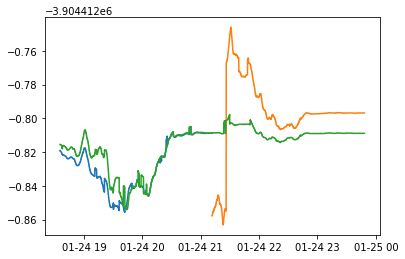

In [154]:
fig,ax = plt.subplots()
ax.plot(sessA.index,(sessA.latitude * DEG2RAD * 6.4e6).values)
ax.plot(sessB.index,(sessB.latitude * DEG2RAD * 6.4e6).values)
ax.plot(sessC.index,(sessC.latitude * DEG2RAD * 6.4e6).values)

print('sessionA:{},sessionB:{},sessionC:{}'.format(*[i.latitude.median() for i in (sessA,sessB,sessC)]))

plt.show()

sessionA:-58.792189788,sessionB:-58.79218934399999,sessionC:-58.792189618


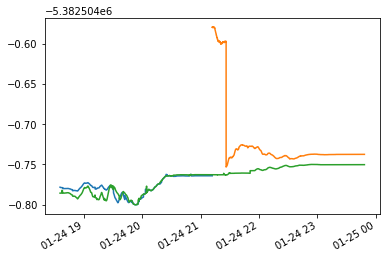

In [155]:
reflat = stat.latitude.median()
cosreflat = cos(reflat * DEG2RAD)

(sessA.longitude * DEG2RAD * cosreflat * 6.4e6).plot()
(sessB.longitude * DEG2RAD * cosreflat * 6.4e6).plot()
(sessC.longitude * DEG2RAD * cosreflat * 6.4e6).plot()

print('sessionA:{},sessionB:{},sessionC:{}'.format(*[i.longitude.median() for i in (sessA,sessB,sessC)]))

plt.show()

sessionA:36.3218,sessionB:36.3269,sessionC:36.3035


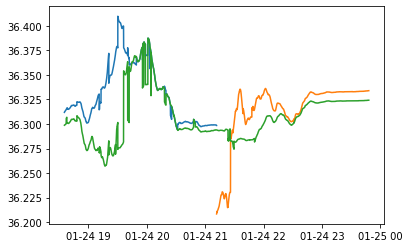

In [156]:
fig,ax = plt.subplots()
ax.plot(sessA.index,(sessA.height).values)
ax.plot(sessB.index,(sessB.height).values)
ax.plot(sessC.index,(sessC.height).values)

print('sessionA:{},sessionB:{},sessionC:{}'.format(*[i.height.median() for i in (sessA,sessB,sessC)]))

plt.show()

In [162]:
print('{:.3f}'.format(sessA.latitude.median() * DEG2RAD * 6.4e6))
print('{:.3f}'.format(sessB.latitude.median() * DEG2RAD * 6.4e6))
print('{:.3f}'.format(sessC.latitude.median() * DEG2RAD * 6.4e6))

-3904412.826
-3904412.797
-3904412.810
